In [1]:
%%capture

!pip install mlxtend
!pip install --upgrade tensorflow

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
!pip install opencv-python
from urllib.request import urlopen
from PIL import Image
import IPython
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist, fashion_mnist
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
print(tf.__version__)
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2.11.0


In [3]:
from PIL import Image
import os, os.path

imgs = []
path = "/Users/anshirsa/Downloads/images"
valid_images = [".jpg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

#### Doing Binary Classification using Keras

In [4]:
def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

In [5]:
num_samples = 200
test_split = 100
cluster_centers = [(15,0), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = BinaryCrossentropy(from_logits=True)

In [6]:
X_training, Targets_training, X_testing, Targets_testing=generate_binary_blobs(num_samples, test_split, loss_function_used)

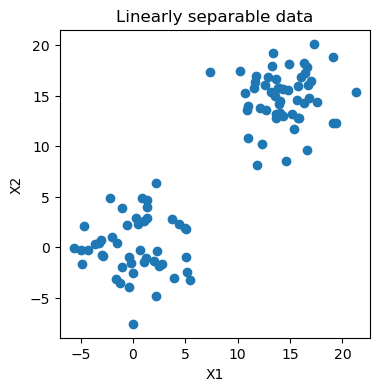

In [7]:
plt.figure(figsize=(4, 4))
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 17ms/step - loss: 4.8357 - accuracy: 0.0000e+00 - val_loss: 1.7344 - val_accuracy: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 3.4479 - accuracy: 0.0000e+00 - val_loss: 0.6774 - val_accuracy: 0.0000e+00
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 2.1066 - accuracy: 0.0000e+00 - val_loss: -0.3502 - val_accuracy: 0.0000e+00
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.8765 - accuracy: 0.0000e+00 - val_loss: -1.3607 - val_accuracy: 0.0000e+00
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: -0.3893 - accuracy: 0.0000e+00 - val_loss: -2.3459 - val_accuracy: 0.0000e+00
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: -1.6219 - accuracy: 0.0000e+00 - val_loss: -3.3788 - val_accuracy: 0.0000e+00
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: -2.8423 - accuracy: 0.0000e+00 - val_loss: -

In [10]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

4/4 [==============================] - 0s 3ms/step - loss: -21.4098 - accuracy: 0.4600
Test results - Loss: -21.409839630126953 - Accuracy: 46.00000083446503%


9600/9600 [==============================] - 13s 1ms/step


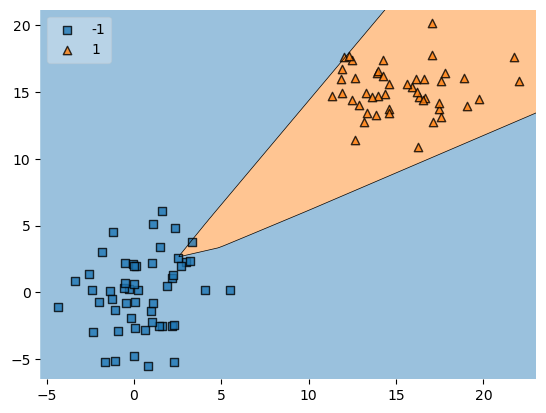

<Figure size 400x400 with 0 Axes>

In [11]:
plot_decision_regions(X_testing, Targets_testing, clf=model, legend=2)
plt.figure(figsize=(4, 4))
plt.show()

Using Binary Classification, we can see that the images dataset has been successfully clustered into two categories
(These two categories are Lions and Cheetahs)

#### Image Classification using Keras

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 224, 224

In [13]:
train_data_dir = '/Users/anshirsa/Downloads/images/train'
validation_data_dir = '/Users/anshirsa/Downloads/images/test'
nb_train_samples = 100
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [14]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [15]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1. / 100,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 100)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 1.7786 - accuracy: 0.4583 - val_loss: 0.7472 - val_accuracy: 0.5208
Epoch 2/10
6/6 [==============================] - 5s 897ms/step - loss: 0.7016 - accuracy: 0.6190 - val_loss: 0.8196 - val_accuracy: 0.4896
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 0.7016 - accuracy: 0.5238 - val_loss: 0.6805 - val_accuracy: 0.5938
Epoch 4/10
6/6 [==============================] - 5s 870ms/step - loss: 0.6792 - accuracy: 0.6071 - val_loss: 0.6717 - val_accuracy: 0.6354
Epoch 5/10
6/6 [==============================] - 5s 905ms/step - loss: 0.7027 - accuracy: 0.5952 - val_loss: 0.6785 - val_accuracy: 0.5729
Epoch 6/10
6/6 [==============================] - 6s 994ms/step - loss: 0.6820 - accuracy: 0.5952 - val_loss: 0.6539 - val_accuracy: 0.5938
Epoch 7/10
6/6 [==============================] - 5s 921ms/step - loss: 0.6871 - acc

In [18]:
model.save_weights('model_saved.h5')

In [19]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model

model.save("/Users/anshirsa/Downloads/") 
model = load_model("/Users/anshirsa/Downloads/")
 
image = load_img('/Users/anshirsa/Downloads/images/test/Cheetahs/113fbf2203ccef57.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Cheetahs , 1- Lions): ", label[0][0])

INFO:tensorflow:Assets written to: /Users/anshirsa/Downloads/assets


INFO:tensorflow:Assets written to: /Users/anshirsa/Downloads/assets


1/1 [==============================] - 0s 112ms/step
Predicted Class (0 - Cheetahs , 1- Lions):  0.50436133
